## Demo of Application of Autoencoder on MNIST data set
* Use 784 X 512 X 256 X 512 X 784 Bottleneck Autoencoder Structure
* Use Mean Squared Error as the loss function 
    - not the best choice for digits classifiction, but can be easily changed
* Parameters are determined by user
    - best parameters may exist, but haven't been tested in this model due to time and computation resource limit

In [1]:
import warnings
import tensorflow as tf
import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from model.autoencoder import Autoencoder

print("Numpy\t\t", np.__version__)
print("Pandas\t\t", pd.__version__)
print("matplotlib\t", mpl.__version__)
print("scikit-learn\t", sklearn.__version__)
print("TensorFlow\t", tf.__version__)

# mpl.style.use('classic')
warnings.filterwarnings("ignore")
%matplotlib inline

Numpy		 1.13.1
Pandas		 0.20.3
matplotlib	 2.0.2
scikit-learn	 0.19.0
TensorFlow	 1.3.0


# Read MNIST data

In [2]:
MNIST_data = h5py.File('./data/MNISTdata.hdf5', 'r')

x_train = np.float32(MNIST_data['x_train'][:] )
y_train = np.int32(np.array(MNIST_data['y_train'][:,0]))
x_test = np.float32( MNIST_data['x_test'][:] )
y_test = np.int32( np.array( MNIST_data['y_test'][:,0]  ) )

In [3]:
# Select train, cv and test set
train = x_train[:50000, :]
cv = x_train[50000:, :]
test = x_test

# Build Auto-Encoder Model

In [4]:
# build Autoencoder
model = Autoencoder(layers=(784, 512, 256, 512, 784), run_id='_log_Autoencoder', seed=2017)

# train model
train_loss, cv_loss = model.train(train, learning_rate=0.001, steps=200, 
                                  batch_size=256, sub_steps=5, cv=cv)

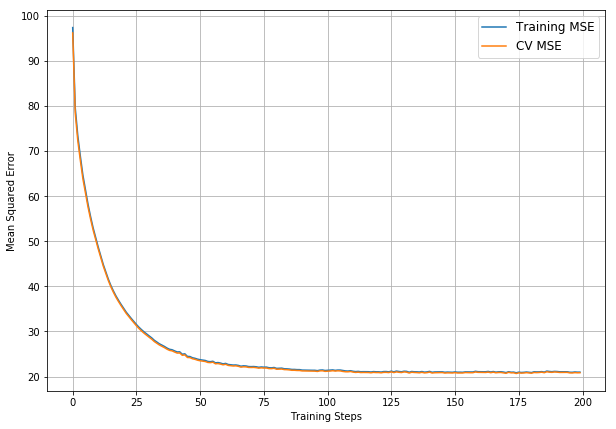

In [5]:
# plot the training and test error
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(train_loss, label='Training MSE')
ax.plot(cv_loss, label='CV MSE')
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Training Steps')
ax.legend(fontsize=12)
ax.grid('on')

plt.show()

# Reconstruct Input

In [6]:
# make predictions on test set
train_en, train_de, train_mse = model.predict(train)
cv_en, cv_de, cv_mse = model.predict(cv)
test_en, test_de, test_mse = model.predict(test)

# Visualization

### Training Set

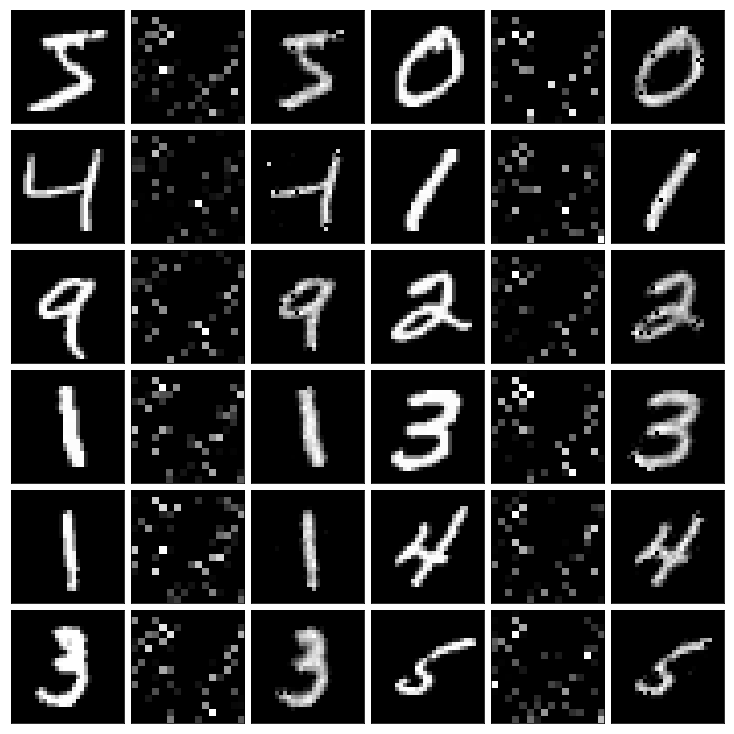

In [7]:
# training set example
n = 6  # the index of image want to show
m = 16  # the shape of encoded image
fig, ax = plt.subplots(nrows=n, ncols=6, figsize=(10, 10))
for i in range(n):
    for j in range(2):
        ax[i, 3*j].imshow(np.reshape(train[2*i + j, :], (28, 28)), 
                          cmap='gray', interpolation='none')
        ax[i, 3*j].set_xticks([])
        ax[i, 3*j].set_yticks([])
        ax[i, 3*j].axis('image')

        ax[i, 3*j+1].imshow(np.reshape(train_en[2*i + j, :], (m, m)), 
                            cmap='gray', interpolation='none')
        ax[i, 3*j+1].set_xticks([])
        ax[i, 3*j+1].set_yticks([])
        ax[i, 3*j+1].axis('image')

        ax[i, 3*j+2].imshow(np.reshape(train_de[2*i + j, :], (28, 28)), 
                         cmap='gray', interpolation='none')
        ax[i, 3*j+2].set_xticks([])
        ax[i, 3*j+2].set_yticks([])
        ax[i, 3*j+2].axis('image')
        
plt.tight_layout(pad=0, h_pad=0, w_pad=0, rect=None)   
plt.show()

### Cross Validation Set

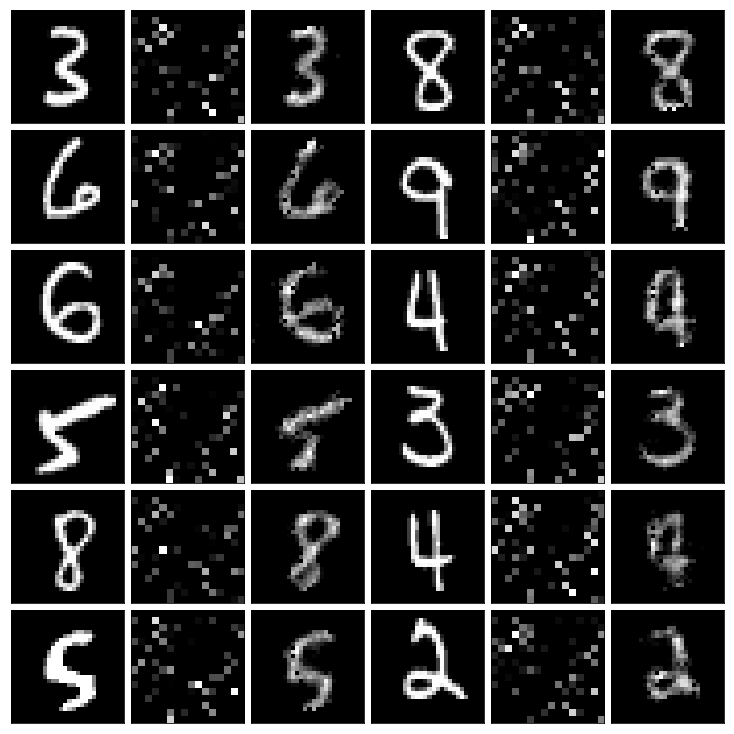

In [8]:
n = 6  # the index of image want to show
m = 16  # the shape of encoded image
fig, ax = plt.subplots(nrows=n, ncols=6, figsize=(10, 10))
for i in range(n):
    for j in range(2):
        ax[i, 3*j].imshow(np.reshape(cv[2*i + j, :], (28, 28)), 
                          cmap='gray', interpolation='none')
        ax[i, 3*j].set_xticks([])
        ax[i, 3*j].set_yticks([])
        ax[i, 3*j].axis('image')

        ax[i, 3*j+1].imshow(np.reshape(cv_en[2*i + j, :], (m, m)), 
                            cmap='gray', interpolation='none')
        ax[i, 3*j+1].set_xticks([])
        ax[i, 3*j+1].set_yticks([])
        ax[i, 3*j+1].axis('image')

        ax[i, 3*j+2].imshow(np.reshape(cv_de[2*i + j, :], (28, 28)), 
                            cmap='gray', interpolation='none')
        ax[i, 3*j+2].set_xticks([])
        ax[i, 3*j+2].set_yticks([])
        ax[i, 3*j+2].axis('image')
        
plt.tight_layout(pad=0, h_pad=0, w_pad=0, rect=None)   
plt.show()

### Test Set

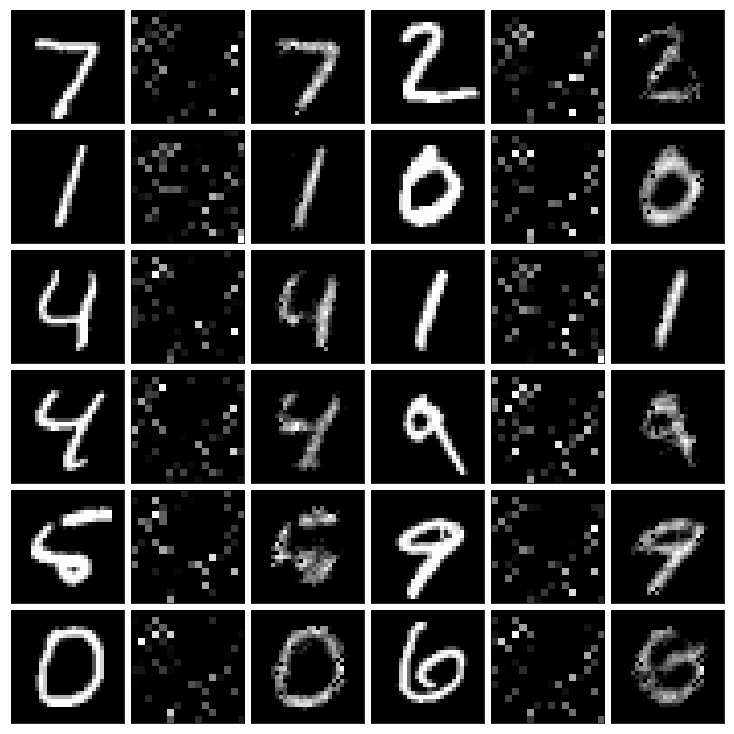

In [9]:
n = 6  # the index of image want to show
m = 16  # the shape of encoded image
fig, ax = plt.subplots(nrows=n, ncols=6, figsize=(10, 10))
for i in range(n):
    for j in range(2):
        ax[i, 3*j].imshow(np.reshape(test[2*i + j, :], (28, 28)), 
                          cmap='gray', interpolation='none')
        ax[i, 3*j].set_xticks([])
        ax[i, 3*j].set_yticks([])
        ax[i, 3*j].axis('image')

        ax[i, 3*j+1].imshow(np.reshape(test_en[2*i + j, :], (m, m)), 
                            cmap='gray', interpolation='none')
        ax[i, 3*j+1].set_xticks([])
        ax[i, 3*j+1].set_yticks([])
        ax[i, 3*j+1].axis('image')

        ax[i, 3*j+2].imshow(np.reshape(test_de[2*i + j, :], (28, 28)), 
                            cmap='gray', interpolation='none')
        ax[i, 3*j+2].set_xticks([])
        ax[i, 3*j+2].set_yticks([])
        ax[i, 3*j+2].axis('image')
        
plt.tight_layout(pad=0, h_pad=0, w_pad=0, rect=None)   
plt.show()